Import stuff here

In [87]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [88]:
trainorig = pd.read_csv('train_HK6lq50.csv')
testorig = pd.read_csv('test_2nAIblo.csv')

In [89]:
trainorig.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [90]:
trainorig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [114]:
testorig.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,1626_45,T_1,T,131,45,offline,intermediate,1626,F,Matriculation,3,46.0,2,N,4.0
1,11020_130,Y_3,Y,135,130,online,easy,11020,M,Bachelors,3,NaN,4,N,4.0
2,12652_146,Y_2,Y,120,146,online,easy,12652,M,Matriculation,3,NaN,2,N,3.0
3,7038_72,V_4,V,122,72,offline,vary hard,7038,F,High School Diploma,1,NaN,2,N,2.0
4,888_71,V_4,V,122,71,offline,intermediate,888,F,Matriculation,3,NaN,2,N,2.0


In [92]:
testorig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 15 columns):
id                           31349 non-null object
program_id                   31349 non-null object
program_type                 31349 non-null object
program_duration             31349 non-null int64
test_id                      31349 non-null int64
test_type                    31349 non-null object
difficulty_level             31349 non-null object
trainee_id                   31349 non-null int64
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
total_programs_enrolled      31349 non-null int64
is_handicapped               31349 non-null object
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 3.6+ MB


In [93]:
trainorig.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [94]:
trainorig[['program_id','is_pass']].groupby(['program_id'],as_index=False).mean().sort_values(by='is_pass',ascending = False).head()

,program_id,is_pass
12,X_1,0.839140
14,X_3,0.801660
13,X_2,0.789406
15,Y_1,0.787049
18,Y_4,0.776203


In [10]:
trainorig[['program_type','is_pass']].groupby(['program_type'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,program_type,is_pass
4,X,0.814002
5,Y,0.764096
6,Z,0.720772
1,T,0.698721
2,U,0.625240
3,V,0.585873
0,S,0.546003


In [11]:
trainorig[['test_type','is_pass']].groupby(['test_type'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,test_type,is_pass
1,online,0.779996
0,offline,0.637898


In [12]:
#TODO ----- check performance of students of different tier in online vs offline

In [13]:
trainorig[['difficulty_level','is_pass']].groupby(['difficulty_level'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,difficulty_level,is_pass
0,easy,0.737189
1,hard,0.667573
2,intermediate,0.654877
3,vary hard,0.430562


In [14]:
trainorig[['gender','is_pass']].groupby(['gender'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,gender,is_pass
1,M,0.704172
0,F,0.685374


In [15]:
#TODO ------ check number of male vs female for different city tier

In [16]:
trainorig[['education','is_pass']].groupby(['education'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,education,is_pass
2,Masters,0.833984
0,Bachelors,0.742509
1,High School Diploma,0.714789
3,Matriculation,0.648592
4,No Qualification,0.583658


In [17]:
trainorig[['city_tier','is_pass']].groupby(['city_tier'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,city_tier,is_pass
0,1,0.732702
1,2,0.696994
2,3,0.683879
3,4,0.617070


In [18]:
trainorig[['trainee_engagement_rating','is_pass']].groupby(['trainee_engagement_rating'],as_index=False).mean().sort_values(by='is_pass',ascending = False)

,trainee_engagement_rating,is_pass
4,5.0,0.862422
3,4.0,0.804393
2,3.0,0.737904
1,2.0,0.685157
0,1.0,0.591522


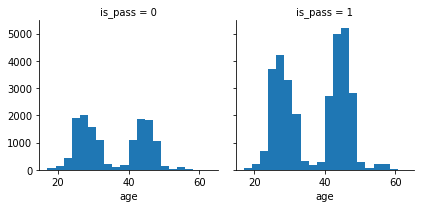

In [19]:
g = sns.FacetGrid(trainorig,col='is_pass')
g.map(plt.hist,'age',bins=20)

In [112]:
trainorig.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [113]:
testafterdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 9 columns):
program_id                   31349 non-null int64
program_type                 31349 non-null int64
test_type                    31349 non-null int64
difficulty_level             31349 non-null int64
gender                       31349 non-null int64
education                    31349 non-null int64
city_tier                    31349 non-null int64
age                          19558 non-null float64
trainee_engagement_rating    31349 non-null int64
dtypes: float64(1), int64(8)
memory usage: 2.2 MB


/usr/local/lib/python3.4/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.4/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


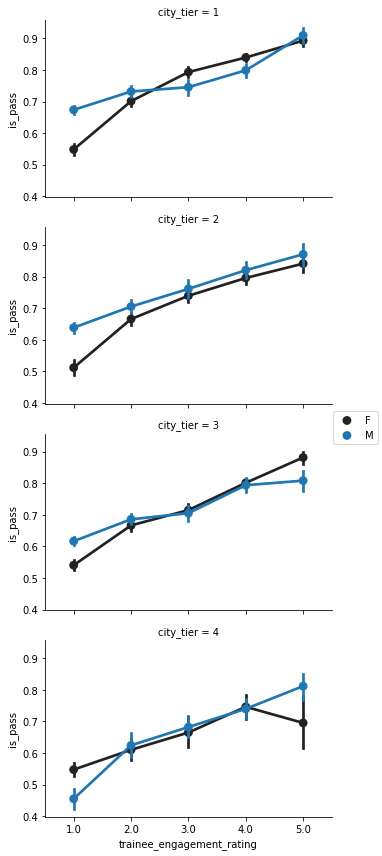

In [21]:
grid = sns.FacetGrid(trainorig,row ='city_tier',size = 3,aspect = 1.6)
grid.map(sns.pointplot, 'trainee_engagement_rating','is_pass','gender')
grid.add_legend()

In [22]:
trainorig.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [23]:
trainafterdrop = trainorig.drop(['id','test_id','trainee_id','is_handicapped','total_programs_enrolled','program_duration'],axis =1)

In [24]:
trainafterdrop.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,Y_1,Y,offline,intermediate,M,Matriculation,3,24.0,1.0,0
1,T_1,T,offline,easy,F,High School Diploma,4,26.0,3.0,1
2,Z_2,Z,online,easy,M,Matriculation,1,40.0,2.0,1
3,T_2,T,offline,easy,F,Matriculation,3,NaN,1.0,1
4,V_3,V,offline,intermediate,F,High School Diploma,1,42.0,4.0,1


In [115]:
testafterdrop = testorig.drop(['id','test_id','trainee_id','is_handicapped','total_programs_enrolled','program_duration'],axis =1)

In [117]:
testafterdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 9 columns):
program_id                   31349 non-null object
program_type                 31349 non-null object
test_type                    31349 non-null object
difficulty_level             31349 non-null object
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
trainee_engagement_rating    31318 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.2+ MB


In [28]:
combine = [trainafterdrop, testafterdrop]
for dataset in combine:
    dataset['gender'] = dataset['gender'].map( {'F': 1, 'M': 0} ).astype(int)
    dataset['education'] = dataset['education'].map( {'No Qualification':0, 'Matriculation': 1, 'High School Diploma': 2,'Bachelors':3,'Masters':4 } ).astype(int)

In [96]:
trainafterdrop.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,24.0,0,0
1,2,1,0,0,1,2,4,26.0,2,1
2,20,6,1,0,0,1,1,40.0,1,1
4,10,3,0,2,1,2,1,42.0,3,1
5,4,1,0,2,1,2,1,29.0,1,0


In [29]:
trainafterdrop.head().nunique()

program_id                   5
program_type                 4
test_type                    2
difficulty_level             2
gender                       2
education                    2
city_tier                    3
age                          4
trainee_engagement_rating    4
is_pass                      2
dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
trainafterdrop['program_id'] = number.fit_transform(y = trainafterdrop['program_id'].astype('str'))
testafterdrop['program_id'] = number.fit_transform(y = testafterdrop['program_id'].astype('str'))

In [31]:
trainafterdrop['difficulty_level'] = number.fit_transform(y = trainafterdrop['difficulty_level'].astype('str'))
testafterdrop['difficulty_level'] = number.fit_transform(y = testafterdrop['difficulty_level'].astype('str'))

In [32]:
trainafterdrop['test_type'] = number.fit_transform(y = trainafterdrop['test_type'].astype('str'))
testafterdrop['test_type'] = number.fit_transform(y = testafterdrop['test_type'].astype('str'))

In [33]:
trainafterdrop.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,Y,0,2,0,1,3,24.0,1.0,0
1,2,T,0,0,1,2,4,26.0,3.0,1
2,20,Z,1,0,0,1,1,40.0,2.0,1
3,3,T,0,0,1,1,3,NaN,1.0,1
4,10,V,0,2,1,2,1,42.0,4.0,1


In [34]:
trainafterdrop['program_type'] = number.fit_transform(y = trainafterdrop['program_type'].astype('str'))
testafterdrop['program_type'] = number.fit_transform(y = testafterdrop['program_type'].astype('str'))
trainafterdrop.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,24.0,1.0,0
1,2,1,0,0,1,2,4,26.0,3.0,1
2,20,6,1,0,0,1,1,40.0,2.0,1
3,3,1,0,0,1,1,3,NaN,1.0,1
4,10,3,0,2,1,2,1,42.0,4.0,1


In [119]:
#Dont do fitting on trainee engagement rating before filling na

trainafterdrop['trainee_engagement_rating'] = number.fit_transform(y = trainafterdrop['trainee_engagement_rating'].astype('float'))
testafterdrop['trainee_engagement_rating'] = number.fit_transform(y = testafterdrop['trainee_engagement_rating'].astype('float'))
trainafterdrop.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,7,0,0
1,2,1,0,0,1,2,4,9,2,1
2,20,6,1,0,0,1,1,23,1,1
4,10,3,0,2,1,2,1,25,3,1
5,4,1,0,2,1,2,1,12,1,0


In [36]:
trainafterdrop.dropna(axis=0, how='any',inplace = True)

In [120]:
testafterdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 9 columns):
program_id                   31349 non-null object
program_type                 31349 non-null object
test_type                    31349 non-null object
difficulty_level             31349 non-null object
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          19558 non-null float64
trainee_engagement_rating    31349 non-null int64
dtypes: float64(1), int64(2), object(6)
memory usage: 2.2+ MB


In [111]:
testafterdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 9 columns):
program_id                   31349 non-null int64
program_type                 31349 non-null int64
test_type                    31349 non-null int64
difficulty_level             31349 non-null int64
gender                       31349 non-null int64
education                    31349 non-null int64
city_tier                    31349 non-null int64
age                          19558 non-null float64
trainee_engagement_rating    31349 non-null int64
dtypes: float64(1), int64(8)
memory usage: 2.2 MB


In [99]:
trainafterdrop['age'] = number.fit_transform(y = trainafterdrop['age'].astype('float'))

In [101]:
testafterdrop['age'] = number.fit_transform(y = testafterdrop['age'].astype('float'))

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating,is_pass
0,15,5,0,2,0,1,3,7,0,0
1,2,1,0,0,1,2,4,9,2,1
2,20,6,1,0,0,1,1,23,1,1
4,10,3,0,2,1,2,1,25,3,1
5,4,1,0,2,1,2,1,12,1,0


In [107]:
testafterdrop.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating
0,2,1,0,2,1,1,3,46.0,3
1,17,5,1,0,0,3,3,NaN,3
2,16,5,1,0,0,1,3,NaN,2
3,11,3,0,3,1,2,1,NaN,1
4,11,3,0,2,1,1,3,NaN,1


In [108]:
#don't even think of dropping test na values !!!!
#test2.dropna(axis=0, how='any',inplace = True)
testafterdrop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 9 columns):
program_id                   31349 non-null int64
program_type                 31349 non-null int64
test_type                    31349 non-null int64
difficulty_level             31349 non-null int64
gender                       31349 non-null int64
education                    31349 non-null int64
city_tier                    31349 non-null int64
age                          19558 non-null float64
trainee_engagement_rating    31349 non-null int64
dtypes: float64(1), int64(8)
memory usage: 2.2 MB


In [106]:
#predict age values based on 

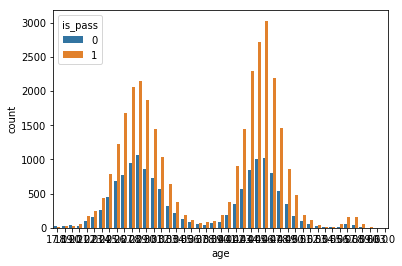

In [40]:
ax = sns.countplot(x="age", data=trainafterdrop, hue = 'is_pass')

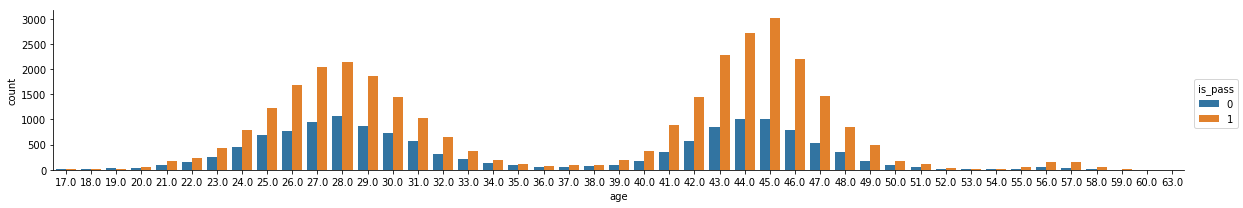

In [41]:
g = sns.factorplot(x="age",data=trainafterdrop, kind="count",size=3, aspect=5.5, hue = 'is_pass' );

In [43]:
trainafterdrop['age'].value_counts(sort = True).head()

45.0    4043
44.0    3723
28.0    3211
43.0    3136
27.0    3005
Name: age, dtype: int64

In [ ]:
#we see that there are 2 major distinctions based on the number of people into data science

#TODO
#1. calculate an age score : prob of is_pass, given the age. ie (is_pass/total) for a particular age

#for a in train2:
 #   train2['agescore'] = 
    

In [44]:
#test-train split

from sklearn.model_selection import train_test_split
columns = trainafterdrop.columns.tolist()


In [45]:
y = trainafterdrop['is_pass']
X_train, X_test, y_train, y_test = train_test_split(trainafterdrop, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(36334, 10) (36334,)
(9084, 10) (9084,)


In [46]:
X_train1 = X_train.drop("is_pass", axis=1)
y_train1 = y_train
X_test1  = X_test.drop("is_pass", axis=1)
y_test1 = y_test
X_train1.shape, y_train1.shape, X_test1.shape

((36334, 9), (36334,), (9084, 9))

In [47]:

svc = SVC()
#Y_train = train2["is_pass"]
svc.fit(X_train1, y_train1)
Y_pred = svc.predict(X_test1)
acc_svc = round(svc.score(X_test1, y_test1) * 100, 2)
acc_svc


71.86

In [48]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1, y_train1)
Y_pred = knn.predict(X_test1)
acc_knn = round(knn.score(X_test1, y_test1) * 100, 2)
acc_knn

72.03

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)
Y_pred = logreg.predict(X_test1)
acc_log = round(logreg.score(X_test1, y_test1) * 100, 2)
acc_log

70.78

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train1, y_train1)
Y_pred = gaussian.predict(X_test1)
acc_gaussian = round(gaussian.score(X_test1, y_test1) * 100, 2)
acc_gaussian

69.75

In [51]:
perceptron = Perceptron()
perceptron.fit(X_train1, y_train1)
Y_pred = perceptron.predict(X_test1)
acc_perceptron = round(perceptron.score(X_test1, y_test1) * 100, 2)
acc_perceptron

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


69.88

In [52]:
linear_svc = LinearSVC()
linear_svc.fit(X_train1, y_train1)
Y_pred = linear_svc.predict(X_test1)
acc_linear_svc = round(linear_svc.score(X_test1, y_test1) * 100, 2)
acc_linear_svc

69.88

In [53]:
sgd = SGDClassifier()
sgd.fit(X_train1, y_train1)
Y_pred = sgd.predict(X_test1)
acc_sgd = round(sgd.score(X_test1, y_test1) * 100, 2)
acc_sgd

/usr/local/lib/python3.4/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


69.82

In [54]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, y_train1)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree = round(decision_tree.score(X_test1, y_test1) * 100, 2)
acc_decision_tree

70.1

In [55]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train1, y_train1)
Y_pred = random_forest.predict(X_test1)
random_forest.score(X_test1, y_test1)
acc_random_forest = round(random_forest.score(X_test1, y_test1) * 100, 2)
acc_random_forest

72.52

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,72.52
1,KNN,72.03
0,Support Vector Machines,71.86
2,Logistic Regression,70.78
8,Decision Tree,70.10
5,Perceptron,69.88
7,Linear SVC,69.88
6,Stochastic Gradient Decent,69.82
4,Naive Bayes,69.75


In [57]:
#imputation for missing values
#from sklearn.preprocessing import Imputer
#my_imputer = Imputer()
#X_test2 = my_imputer.fit_transform(X_test1)

In [109]:
testafterdrop.isnull().sum()

program_id                       0
program_type                     0
test_type                        0
difficulty_level                 0
gender                           0
education                        0
city_tier                        0
age                          11791
trainee_engagement_rating        0
dtype: int64

In [65]:
testorig["age"].replace(0, np.nan, inplace= True)

In [72]:
mean_value=trainorig['age'].mean()
testorig['age']=testorig['age'].fillna(mean_value)

In [74]:
testorig['age'] = round(testorig['age'])

In [76]:
testfinal = testorig.drop(['id','test_id','trainee_id','is_handicapped','total_programs_enrolled','program_duration'],axis =1)

In [86]:
testfinal.head()

,program_id,program_type,test_type,difficulty_level,gender,education,city_tier,age,trainee_engagement_rating
0,T_1,T,offline,intermediate,F,Matriculation,3,46.0,4.0
1,Y_3,Y,online,easy,M,Bachelors,3,36.0,4.0
2,Y_2,Y,online,easy,M,Matriculation,3,36.0,3.0
3,V_4,V,offline,vary hard,F,High School Diploma,1,36.0,2.0
4,V_4,V,offline,intermediate,F,Matriculation,3,36.0,2.0


In [84]:
mean_value=trainorig['trainee_engagement_rating'].mean()
testfinal['trainee_engagement_rating']=testfinal['trainee_engagement_rating'].fillna(mean_value)

In [85]:
testfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31349 entries, 0 to 31348
Data columns (total 9 columns):
program_id                   31349 non-null object
program_type                 31349 non-null object
test_type                    31349 non-null object
difficulty_level             31349 non-null object
gender                       31349 non-null object
education                    31349 non-null object
city_tier                    31349 non-null int64
age                          31349 non-null float64
trainee_engagement_rating    31349 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 2.2+ MB


In [81]:
y = trainafterdrop['is_pass']
X_train, X_test, y_train, y_test = train_test_split(trainafterdrop, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(36334, 10) (36334,)
(9084, 10) (9084,)


In [83]:
X_train1 = X_train.drop("is_pass", axis=1)
y_train1 = y_train
X_test1  = X_test.drop("is_pass", axis=1)
y_test1 = y_test
X_train1.shape, y_train1.shape, X_test1.shape

((36334, 9), (36334,), (9084, 9))

In [ ]:
svc = SVC()
#Y_train = train2["is_pass"]
svc.fit(X_train1, y_train1)
Y_pred = svc.predict(X_test1)
acc_svc = round(svc.score(X_test1, y_test1) * 100, 2)
acc_svc
